<div class="alert alert-block alert-info">
__Name__: salmonella_extract_features<br/>
__Description__: Identify important features from classifiers<br/>
__Author__: Matthew Whiteside matthew dot whiteside at canada dot ca<br/>
__Date__: Dec 8, 2017<br/>
__TODO__:<br/>
</div>

In [2]:
%load_ext autoreload
%autoreload 2

In [44]:
import numpy as np
import pandas as pd
import os
import sys
os.chdir('../pangenome')
import utils
import config
from sklearn.externals import joblib

In [7]:
data = utils.load_salmonella_data()
X_train = data.X_train.toarray()
X_test = data.X_test.toarray()

0.950904392765
0.94315245478


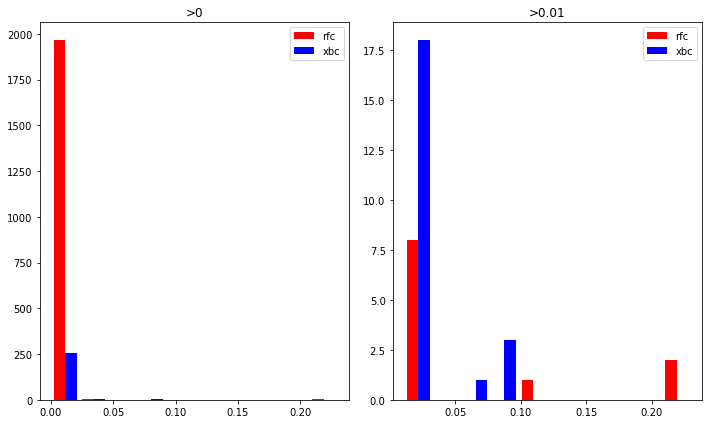

In [33]:
# AMP
y_train = data.y_train["AMP"].tolist()
y_test = data.y_test["AMP"].tolist()
rfc = joblib.load(config.S['amp_rfc'])
xbc = joblib.load(config.S['amp_xbc'])

rfc.fit( X_train, y_train )
print(rfc.score(X_test, y_test))

xbc.fit( X_train, y_train )
print(xbc.score(X_test, y_test))

import matplotlib
matplotlib.rcParams['figure.figsize'] = [10,6]
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2)
ax0, ax1 = axes.flatten()

imp1 = [rfc.feature_importances_[rfc.feature_importances_ != 0], 
       xbc.feature_importances_[xbc.feature_importances_ != 0]]
imp2 = [rfc.feature_importances_[rfc.feature_importances_ > 0.01], 
       xbc.feature_importances_[xbc.feature_importances_ > 0.01]]
n_bins = 10

ax0.hist(imp1, n_bins, histtype='bar', color=['red', 'blue'], label=['rfc','xbc'])
ax0.legend(prop={'size': 10})
ax0.set_title(">0")

ax1.hist(imp2, n_bins, histtype='bar', color=['red', 'blue'], label=['rfc','xbc'])
ax1.legend(prop={'size': 10})
ax1.set_title(">0.01")

fig.tight_layout()

plt.show()

Random forest classifier uses significantly more low importance features to generate prediction. Also has a small number of higher importance features. XGboost uses a moderate number of features more equally weighted

0.956072351421
0.93023255814


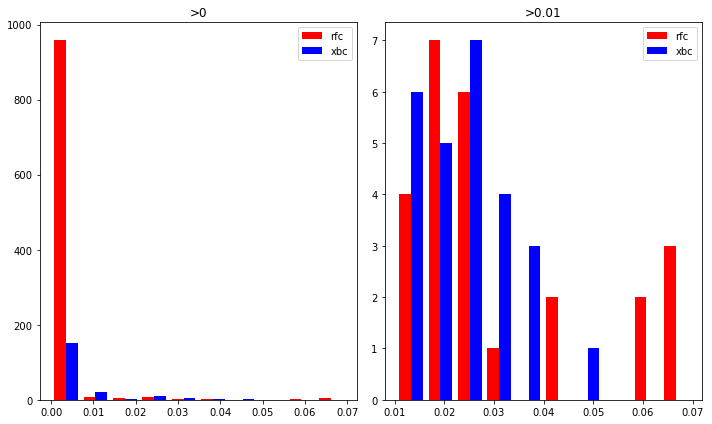

In [34]:
y_train = data.y_train["TCY"].tolist()
y_test = data.y_test["TCY"].tolist()
rfc = joblib.load(config.S['tcy_rfc'])
xbc = joblib.load(config.S['tcy_xbc'])

rfc.fit( X_train, y_train )
print(rfc.score(X_test, y_test))

xbc.fit( X_train, y_train )
print(xbc.score(X_test, y_test))

fig, axes = plt.subplots(nrows=1, ncols=2)
ax0, ax1 = axes.flatten()

imp1 = [rfc.feature_importances_[rfc.feature_importances_ != 0], 
       xbc.feature_importances_[xbc.feature_importances_ != 0]]
imp2 = [rfc.feature_importances_[rfc.feature_importances_ > 0.01], 
       xbc.feature_importances_[xbc.feature_importances_ > 0.01]]
n_bins = 10

ax0.hist(imp1, n_bins, histtype='bar', color=['red', 'blue'], label=['rfc','xbc'])
ax0.legend(prop={'size': 10})
ax0.set_title(">0")

ax1.hist(imp2, n_bins, histtype='bar', color=['red', 'blue'], label=['rfc','xbc'])
ax1.legend(prop={'size': 10})
ax1.set_title(">0.01")

fig.tight_layout()

plt.show()

Tetracycline shows similar feature importance distribution

0.945736434109
0.953488372093


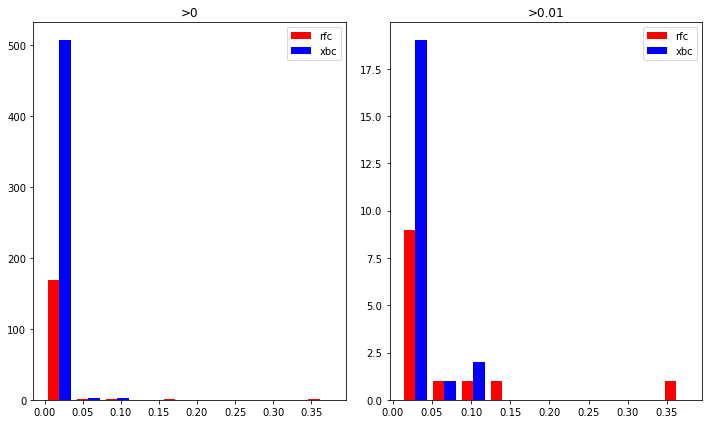

In [35]:
y_train = data.y_train["STR"].tolist()
y_test = data.y_test["STR"].tolist()
rfc = joblib.load(config.S['str_rfc'])
xbc = joblib.load(config.S['str_xbc'])

rfc.fit( X_train, y_train )
print(rfc.score(X_test, y_test))

xbc.fit( X_train, y_train )
print(xbc.score(X_test, y_test))

fig, axes = plt.subplots(nrows=1, ncols=2)
ax0, ax1 = axes.flatten()

imp1 = [rfc.feature_importances_[rfc.feature_importances_ != 0], 
       xbc.feature_importances_[xbc.feature_importances_ != 0]]
imp2 = [rfc.feature_importances_[rfc.feature_importances_ > 0.01], 
       xbc.feature_importances_[xbc.feature_importances_ > 0.01]]
n_bins = 10

ax0.hist(imp1, n_bins, histtype='bar', color=['red', 'blue'], label=['rfc','xbc'])
ax0.legend(prop={'size': 10})
ax0.set_title(">0")

ax1.hist(imp2, n_bins, histtype='bar', color=['red', 'blue'], label=['rfc','xbc'])
ax1.legend(prop={'size': 10})
ax1.set_title(">0.01")

fig.tight_layout()

plt.show()

In streptomycin, XGBoost has many low weight features. Opposite of before, however, Random forest still relies on a small number of high importance features.

In [36]:
# Check overlap with known AMR annotations
# AMP
y_train = data.y_train["AMP"].tolist()
y_test = data.y_test["AMP"].tolist()
rfc = joblib.load(config.S['amp_rfc'])
xbc = joblib.load(config.S['amp_xbc'])

rfc.fit( X_train, y_train )
print(rfc.score(X_test, y_test))

xbc.fit( X_train, y_train )
print(xbc.score(X_test, y_test))



0.950904392765
0.94315245478


In [107]:
# Import annotation module
src_dir = os.path.join(os.getcwd(), os.pardir, 'annotate')
sys.path.append(src_dir)
from panseqannot import annot

ann = annot.PanseqAnnot(config.S['panseqdir'])
rfi = pd.DataFrame(data=rfc.feature_importances_[rfc.feature_importances_ > 0.01], 
                   index=data.locus_index[rfc.feature_importances_ > 0.01],
                   columns=['importance'])
rfi.sort_values('importance', ascending=False, inplace=True)
xbi = pd.DataFrame(data=xbc.feature_importances_[xbc.feature_importances_ > 0.01], 
                   index=data.locus_index[xbc.feature_importances_ > 0.01],
                   columns=['importance'])
xbi.sort_values('importance', ascending=False, inplace=True)


print("\nRandomForest")
rfhit=0
for i, r in rfi.iterrows():
    print(i,r[0])
    a = ann.get_annotations(i)
    print(a)
    if len(a) > 0:
        rfhit=rfhit + 1
        
print("\nProportion with AMR annotations")
print(np.round(rfhit/rfi.shape[0],4))
        
print("\nXGBoost")
xbhit=0
for i, r in xbi.iterrows():
    print(i,r[0])
    a = ann.get_annotations(i)
    print(a)
    if len(a) > 0:
        xbhit=xbhit + 1
        
print("\nProportion with AMR annotations")
print(np.round(xbhit/xbi.shape[0],4))
    


RandomForest
1511216226000 0.230017225318
defaultdict(<class 'list'>, {'rgi': ['{"ORF_ID":"lcl|595_dot_68|CP016411___Salmonella_enterica_subsp._enterica_serovar_Infantis_strain_N55391_plasmid_pN55391__complete_sequence.____Salmonella_enterica_subsp._enterica_serovar_Infantis_strain_N55391_|_595.68__280","CONTIG":"ID=883_280;partial=00;start_type=ATG;rbs_motif=AGGA\\/GGAG\\/GAGG;rbs_spacer=11-12bp;gc_cont=0.584","START":282826,"STOP":284040,"ORIENTATION":"+","CUT_OFF":"Strict","PASS_EVALUE":null,"Best_Hit_evalue":0.0,"Best_Hit_ARO":"floR","Best_Identities":99.26,"ARO":"ARO:3002705","ARO_name":"floR","Model_type":"protein homolog model","SNP":null,"Best_Hit_ARO_category":"efflux pump complex or subunit conferring antibiotic resistance","ARO_category":"efflux pump complex or subunit conferring antibiotic resistance","PASS_bitscore":750,"Best_Hit_bitscore":780.015,"bit_score":"780.015","Predicted_DNA":"ATGACCACCACACGCCCCGCGTGGGCCTATACGCTGCCGGCAGCACTGCTGCTGATGGCTCCTTTCGACATCCTCGCTTCACTGGCG

In [88]:
for l in np.setdiff1d(rfloci,xbloci):
    print(l)
    print(ann.get_annotations(l))

13600942361000
defaultdict(<class 'list'>, {})
16623373970000
defaultdict(<class 'list'>, {'rgi': ['{"ORF_ID":"lcl|85569_dot_105|CTNA01000070___Salmonella_enterica_subsp._enterica_serovar_Typhimurium_str._DT104_genome_assembly_5275_1_12__scaffold_ERS011629SCcontig000070__whole_genome_shotgun_sequence.____Salmonella_enterica_subsp._enterica_serovar_Typhimurium_str._DT104_strain_V25_|_85569.105__(383..1973)_1","CONTIG":"ID=799_1;partial=00;start_type=ATG;rbs_motif=AGGA;rbs_spacer=5-10bp;gc_cont=0.489","START":180,"STOP":1040,"ORIENTATION":"-","CUT_OFF":"Perfect","PASS_EVALUE":null,"Best_Hit_evalue":0.0,"Best_Hit_ARO":"TEM-1","Best_Identities":100.0,"ARO":"ARO:3000873","ARO_name":"TEM-1","Model_type":"protein homolog model","SNP":null,"Best_Hit_ARO_category":"antibiotic inactivation enzyme; determinant of beta-lactam resistance","ARO_category":"antibiotic inactivation enzyme; determinant of beta-lactam resistance","PASS_bitscore":500,"Best_Hit_bitscore":591.267,"bit_score":"591.267","Pred

In [89]:
for l in np.setdiff1d(xbloci,rfloci):
    print(l)
    print(ann.get_annotations(l))

10578510772000
defaultdict(<class 'list'>, {})
15112158164000
defaultdict(<class 'list'>, {})
15112158349000
defaultdict(<class 'list'>, {})
15112158440000
defaultdict(<class 'list'>, {'resfams': ['{"target":"lcl|595_dot_68|CP016411___Salmonella_enterica_subsp._enterica_serovar_Infantis_strain_N55391_plasmid_pN55391__complete_sequence.____Salmonella_enterica_subsp._enterica_serovar_Infantis_strain_N55391_|_595.68_|strand=1;frame=2;relstart=172412;relend=173710","tacc":"-","query":"TetA","qacc":"RF0127","evalue":7.4e-212,"score":704.5,"bias":23.6,"domain_evalue":8.5e-212,"domain_score":704.3,"domain_bias":23.6,"exp":1.0,"reg":1,"clu":0,"ov":0,"env":1,"dom":1,"rep":1,"inc":1,"description":"-"}'], 'resfinder': ['{"qseqid":"lcl|595_dot_68|CP016411___Salmonella_enterica_subsp._enterica_serovar_Infantis_strain_N55391_plasmid_pN55391__complete_sequence.____Salmonella_enterica_subsp._enterica_serovar_Infantis_strain_N55391_|_595.68_","sseqid":"tet(A)_4_AJ517790","pident":100.0,"length":1200,"q

In [90]:
rfi = pd.DataFrame(data=rffi, index=rfloci, columns=['importance'])

In [91]:
rfi

,importance
10578510760000,0.225678
13600942361000,0.014543
1511216226000,0.230017
16623373970000,0.015306
21157021366000,0.102614
21157021402000,0.020393
22668237200000,0.021562
24179453003000,0.026182
25690669055000,0.021830
28713100402000,0.019168


In [105]:
xbi.shape

(22, 1)